<a href="https://colab.research.google.com/github/SergeyPishchulov/CurrencyConverter/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%22%D0%94%D0%A3_%E2%84%966_%D0%9A%D0%BB%D0%B8%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import numpy.random as rand
import random
import pylab
import math

In [44]:


a_line=np.linspace(0.5, 1.5, 1000)
b_line=np.linspace(0, 3, 1000)
xx, yy = np.meshgrid(a_line, b_line)

def get_d_m0(a,b): return b**2+2*b-4*a+1
def get_d_m1(a,b): return a**2+6*a-8*b+1

def get_lambda_m0(a,b, d):
  l1=(b-1+cmath.sqrt(d))/2
  l2=(b-1-cmath.sqrt(d))/2 
  return l1,l2

def get_lambda_m1(a,b, d):
  l1=(a-1+cmath.sqrt(d))/2
  l2=(a-1-cmath.sqrt(d))/2 
  return l1,l2   

def get_color(a, b, get_d, get_lambda):
    d=get_d(a,b)
    l1, l2 = get_lambda(a,b, d)
    if d>=0:
      if l1.real > 0 and l2.real>0:
        return 0 # Неустойчивый узел
      if l1.real<0 and l2.real<0:
        return 1 # Устойчивый узел 
      return 2 # Седло
    if l1.real==0:
      return 3 # Центр
    if l1.real>0:
      return 4 # Неустойчивый фокус
    return 5 # Устойчивый фокус

def get_portarit_type(c):
  if c==0:
    return "Неустойчивый узел"
  if c==1:
    return "Устойчивый узел"
  if c==2:
    return "Седло"
  if c==3:
    return "Центр"
  if c==4:
    return "Неустойчивый фокус"
  if c==5:
    return "Устойчивый фокус"

def get_portarit_type_by_parameters(a,b, eq_point):
  if eq_point=="m0":
    get_d, get_lambda =get_d_m0, get_lambda_m0
  if eq_point=="m1":
    get_d, get_lambda =get_d_m1, get_lambda_m1
  color=get_color(a,b,get_d, get_lambda)
  return get_portarit_type(color)


      






Бифуркационная диаграмма типов фазовых портретов по параметрам

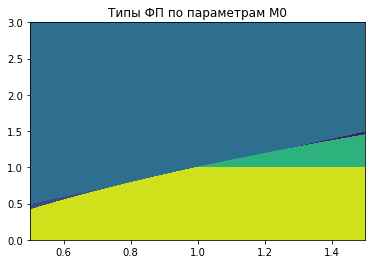

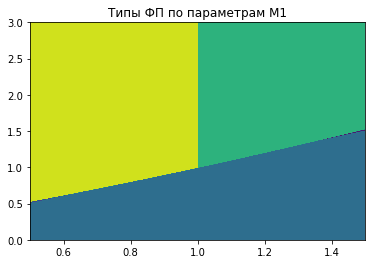

In [45]:
colors_m0 = np.vectorize(get_color)(xx, yy, get_d_m0, get_lambda_m0)
h = plt.contourf(a_line, b_line, colors_m0)
plt.title("Типы ФП по параметрам М0")
plt.axis()
plt.show()

colors_m1 = np.vectorize(get_color)(xx, yy, get_d_m1, get_lambda_m1)
h = plt.contourf(a_line, b_line, colors_m1, levels=6)
plt.title("Типы ФП по параметрам М1")
plt.axis()
plt.show() 

In [9]:
def mean(s):
  l=sorted(list(s))
  middleIndex = int((len(l) - 1)/2)
  return l[middleIndex]

def get_all_portrait_types():
  al=np.linspace(0.5, 1.5, 100)
  bl=np.linspace(0, 3, 300)
  params_by_type={}
  for a in al:
    for b in bl:
      t0=get_portarit_type_by_parameters(a,b,'m0')
      t1=get_portarit_type_by_parameters(a,b,'m1')
      p=(t0,t1)
      if not p in params_by_type: params_by_type[p]=set()
      params_by_type[p].add((a,b))
  res=[]
  for t in params_by_type:
    a,b=mean(params_by_type[t])
    res.append((t, a, b))
  return res
types=get_all_portrait_types()
print(len(types),"Типов")
print(types)

8 Типов
[(('Устойчивый фокус', 'Седло'), 1.0656565656565657, 0.9130434782608696), (('Устойчивый узел', 'Седло'), 0.601010101010101, 0.5618729096989967), (('Седло', 'Устойчивый узел'), 0.5909090909090909, 0.5919732441471572), (('Седло', 'Устойчивый фокус'), 0.7323232323232324, 2.277591973244147), (('Неустойчивый фокус', 'Седло'), 1.3484848484848486, 1.2842809364548495), (('Седло', 'Неустойчивый фокус'), 1.2373737373737375, 1.394648829431438), (('Неустойчивый узел', 'Седло'), 1.3888888888888888, 1.374581939799331), (('Седло', 'Неустойчивый узел'), 1.4090909090909092, 1.4247491638795986)]


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
t_delta=0.001
t = np.arange(0,5,t_delta)
a=1
b=2


def get_plot(x0, y0, a=1, b=2, points_count=10**5, tm=10**3):
  xs=np.zeros(points_count)
  ys=np.zeros(points_count)
  xs[0]=x0
  ys[0]=y0

  for t in range(1, points_count):
    x=xs[t-1]
    y=ys[t-1]
    xv=(y-x)/tm
    yv=(-a*x+b*y-x*x*y)/tm
    xs[t]=x+xv
    ys[t]=y+yv
  return xs, ys

def f(x, y, a, b, reverse=False): # dx/dt
  return (-1 if reverse else 1) * (y - x)

def g(x, y, a, b, reverse=False): # dy/dt
  return (-1 if reverse else 1) * (-a * x + b * y - x * x * y)

def get_next(x, y, a, b, h, reverse=False):
  k1 = h * f(x, y, a, b, reverse=reverse)
  l1 = h * g(x, y, a, b, reverse=reverse)
  k2 = h * f(x + k1 / 2, y + l1 / 2, a, b, reverse=reverse)
  l2 = h * g(x + k1 / 2, y + l1 / 2, a, b, reverse=reverse)
  k3 = h * f(x + k2 / 2, y + l2 / 2, a, b, reverse=reverse)
  l3 = h * g(x + k2 / 2, y + l2 / 2, a, b, reverse=reverse)
  k4 = h * f(x + k3, y + l3, a, b, reverse=reverse)
  l4 = h * g(x + k3, y + l3, a, b, reverse=reverse)
  return (x + (k1 + 2 * k2 + 2 * k3 + k4) / 6,
            y + (l1 + 2 * l2 + 2 * l3 + l4) / 6)

def get_plot_runge_kutt(x0, y0, a=1, b=2, h=1e-2, points_count=10**5):
  xs=np.zeros(points_count)
  ys=np.zeros(points_count)
  xs[0]=x0
  ys[0]=y0

  for t in range(1, points_count):
    x=xs[t-1]
    y=ys[t-1]
    (xs[t], ys[t]) = get_next(x,y, a,b,h)
  return xs, ys



In [11]:

# plt.plot(*get_plot(0, 0.01))
# plt.plot(*get_plot(1, -2,points_count=10**6, tm=10**5))
# area=equilibrium_points[1][0]+0.3, equilibrium_points[1][1]+0.6
# plt.plot(*get_plot(*area), color='g')
# area=equilibrium_points[2][0]-0.3, equilibrium_points[2][1]-0.6
# plt.plot(*get_plot(*area), color='g')
# for (x,y) in equilibrium_points:
#   plt.plot(x,y,'ro',color='r')
# plt.show()

Предельные циклы

In [12]:
epsilon=0.005

def get_cycle_start(tuples, x_eq, y_eq, printing=True):
  xp_cur=None
  xp_prev=None
  min_dist=1000
  for i in range(len(tuples)-1):
    prev_x, prev_y = tuples[i-1]
    cur_x, cur_y = tuples[i]    
    if prev_y>y_eq and cur_y<y_eq:
        xp_prev=xp_cur
        xp_cur=cur_x
        # print("Zero", xp_cur, xp_prev)
        if xp_prev: min_dist=min(min_dist, abs(xp_cur-xp_prev))
        if xp_prev and abs(xp_cur-xp_prev)<epsilon*2:
          if printing: plt.plot(cur_x, cur_y,'ro',color='m')
          return cur_x, y_eq
  lists=list(map(list, zip(*tuples)))
  xs, ys = lists[0], lists[1]
  plt.plot(xs, ys, color='g')
  raise RuntimeError(f"Стартовая точка не найдена; min_dist={min_dist}; need epsilon={epsilon}")


def get_cycle(xs, ys, x_eq, y_eq, printing=True):
  tuples=list(zip(xs, ys))
  start_x, start_y = get_cycle_start(tuples, x_eq, y_eq, printing)
  start_found=False
  cycle=[]
  min_dist=10000
  was_opposite_x=False
  for i in range(len(tuples)-1):
    prev_x, prev_y =tuples[i-1]
    cur_x, cur_y = tuples[i]
    min_dist=min([min_dist, abs(cur_x-start_x)+ abs(cur_y-y_eq)])
    if not start_found and abs(cur_x-start_x)<epsilon*2 and abs(cur_y-y_eq)<epsilon*2:
      start_found=True
      continue
    if start_found:
      cycle.append((cur_x, cur_y))
      if cur_x < x_eq: was_opposite_x=True
      if was_opposite_x and cur_x > x_eq and prev_x > x_eq and (cur_y-y_eq)*(prev_y-y_eq)<0:
        lists=list(map(list, zip(*cycle)))
        return lists[0], lists[1]
  if not start_found:
    print(f"START NOT FOUND; min_dist={min_dist}, epsilon={epsilon}")
  plt.plot(xs, ys, color='g')
  raise RuntimeError(f"Цикл не найден; start found = {start_found}")



def print_plots_in_cycle_area(cycle):
  all_coordiantes=list(zip(cycle[0], cycle[1]))
  c_min=np.amin(all_coordiantes)
  c_max=np.amax(all_coordiantes)
  for i in range(5):
    k=1.3
    x0=random.uniform(c_min*k,c_max*k)
    y0=random.uniform(c_min*k,c_max*k)
    plt.plot(*get_plot(x0, y0), color='#4169E1')
    length=c_max-c_min
    r=0.2
    x0=(c_min+c_max)/2+length*random.uniform(-r, r)
    y0=(c_min+c_max)/2+length*random.uniform(-r, r)
    # y0=(c_min+c_max)/2*(1+random.random())
    plt.plot(*get_plot(x0, y0), color='#4169E1')



In [13]:
# equilibrium_point=equilibrium_points[0]
# x_eq, y_eq = equilibrium_point

# xs, ys = get_plot(x0=1, y0=-0.2,points_count=10**6, tm=10**4)
# plt.plot(xs, ys, color='g')
# cycle=get_cycle(xs, ys, x_eq, y_eq)
# print_plots_in_cycle_area(cycle)
# plt.plot(xs, ys, color='g')
# plt.plot(cycle[0], cycle[1], color='r')
# plt.show()

# xs, ys = get_plot(x0=0.5, y0=-0.3, a=1.4, b=1, points_count=10**6, tm=100)
# cycle=get_cycle(xs, ys, x_eq, y_eq)
# # print_plots_in_cycle_area(cycle)
# plt.plot(xs, ys, color='g')
# plt.plot(cycle[0], cycle[1], color='r')
# plt.show()


NameError: ignored

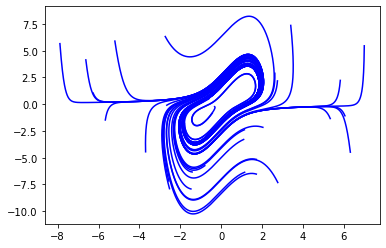

In [14]:
start_points_count=30
h=8
l=-h
x_start=rand.uniform(low=l, high=h, size=start_points_count)
y_start=rand.uniform(low=l, high=h, size=start_points_count)
for i in range(start_points_count):
  plt.plot(*get_plot(x_start[i], y_start[i], points_count=10**4), color='b')
plt.show()


Атлас фазовых портретов М0 (TODO Delete)


In [15]:
# import matplotlib.pyplot as pyplot
# a=1
# b=0.2
# # pyplot.style.use('ggplot')
# pyplot.subplot (2, 3, 1)
# pyplot.plot (*get_plot(5,5, a=a, b=b, points_count=10**6, tm=100))
# pyplot.title (f"a={a}; b={b}")

# pyplot.subplot (2, 3, 2)
# a, b=1.4, 1
# pyplot.plot (*get_plot(5,5, a=a, b=b, points_count=10**6, tm=100))
# pyplot.title (f"a={a}; b={b}")
# pyplot.show()

# pyplot.subplot (2, 3, 3)
# a, b=1, 2
# pyplot.plot (*get_plot(0.1, 0.1, a=a, b=b, points_count=10**6, tm=100))
# pyplot.title (f"a={a}; b={b}")
# pyplot.show()





In [ ]:
# fig, axs = plt.subplots(nrows=3, ncols=3)
# abs=[(1,0.2), (1.4, 1), (1,2)]
# for ((a, b), ax) in list(zip(abs, axs.reshape(-1))):
#   ax.plot(*get_plot(0.1, 0.1, a=a, b=b, points_count=10**4, tm=100))
#   pyplot.title (f"a={a}; b={b}")
# pyplot.show()




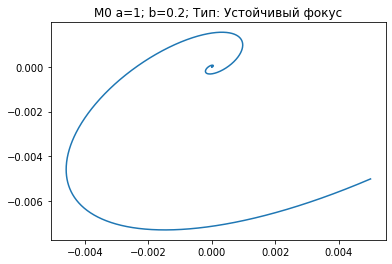

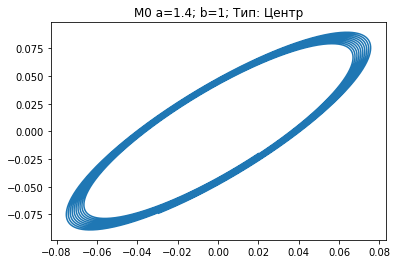

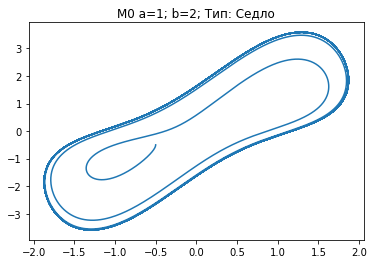

In [16]:
abxy=[(1,0.2, 0.005, -0.005), (1.4, 1, 0.02, -0.02), (1,2, -0.5, -0.5)]
for (a, b, x0, y0) in abxy:
  plt.plot (*get_plot(x0, y0, a=a, b=b, points_count=10**4, tm=100))
  plt.title (f"M0 a={a}; b={b}; Тип: {get_portarit_type_by_parameters(a,b,'m0')}")
  plt.show()

Орбиты циклов

In [17]:
for (a,b) in [(1,2), (1.4, 2)]:
  equilibrium_points=[(0,0), (math.sqrt(b-a), math.sqrt(b-a)), (-math.sqrt(b-a),-math.sqrt(b-a)) ]

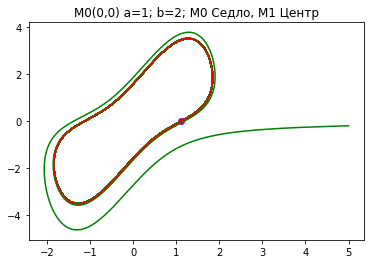

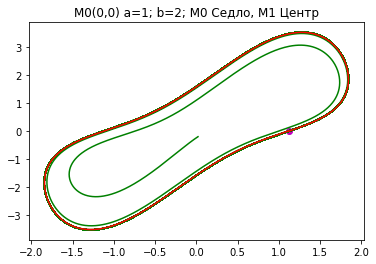

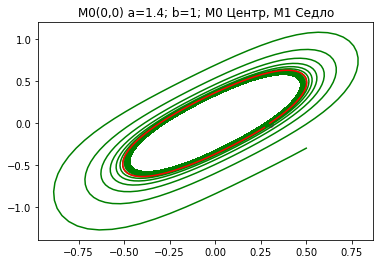

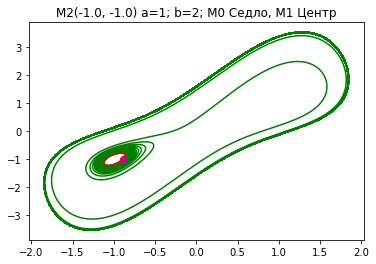

In [18]:


equilibrium_point=equilibrium_points[0]
x_eq, y_eq = equilibrium_point

a,b =1,2
xs, ys = get_plot_runge_kutt(x0=5, y0=-0.2, a=a, b=b, points_count=10**5)
cycle=get_cycle(xs, ys, x_eq, y_eq)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M0(0,0) a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()

a,b =1,2
xs, ys = get_plot_runge_kutt(x0=0.02, y0=-0.2, a=a, b=b, points_count=10**5)
cycle=get_cycle(xs, ys, x_eq, y_eq)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M0(0,0) a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()

a, b=1.4, 1
xs, ys = get_plot(x0=0.5, y0=-0.3, a=a, b=b, points_count=10**6, tm=10)
cycle=get_cycle(xs, ys, x_eq, y_eq)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M0(0,0) a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()

a,b = 1, 2
x_eq, y_eq = (-math.sqrt(b-a),-math.sqrt(b-a))
xs, ys = get_plot_runge_kutt(x0=-1.1, y0=-1.2, a=a, b=b, points_count=10**6)
# print_plots_in_cycle_area(cycle)
plt.plot(xs, ys, color='g')
cycle=get_cycle(xs, ys, x_eq, y_eq)
plt.plot(cycle[0], cycle[1], color='r')
plt.title(f"M2{x_eq, y_eq} a={a}; b={b}; M0 {get_portarit_type_by_parameters(a,b,'m0')}, M1 {get_portarit_type_by_parameters(a,b,'m1')}")
plt.show()


# t0=get_portarit_type_by_parameters(a,b,'m0')
#       t1=get_portarit_type_by_parameters(a,b,'m1')

Периоды циклов

In [19]:
def get_eq_points_m0(a,b): return 0,0
def get_eq_points_m1(a,b): return (math.sqrt(b-a), math.sqrt(b-a))
def get_eq_points_m2(a,b): return (-math.sqrt(b-a), -math.sqrt(b-a))



def get_periods(x0, y0, get_eq, a_line, b, h):
  ts=[]
  for a in a_line:
    x_eq, y_eq = get_eq(a,b)
    xs, ys = get_plot_runge_kutt(x0, y0, a=a, b=b, h=h, points_count=10**5)
    cycle=get_cycle(xs, ys, x_eq, y_eq, printing=False)
    n=len(xs)
    t=n*h
    ts.append(t)
  return ts

TS: [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]


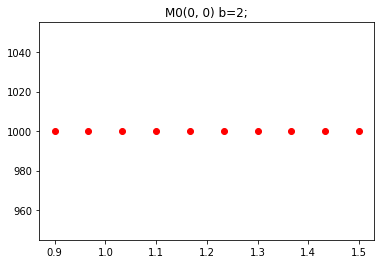

In [20]:
b=2
a_line=np.linspace(0.9, 1.5, 10)#при а=0.5 нет цикла
# a_line=[1, 1.2, 1.5]
h=1e-2
x_eq, y_eq = 0, 0
ts=get_periods(x0=5, y0=-0.2, get_eq=get_eq_points_m0, a_line=a_line, b=b, h=h)
print("TS:", ts)
plt.plot(a_line, ts, "ro")
plt.title(f"M0{x_eq, y_eq} b={b};")
plt.show()

TS: [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]


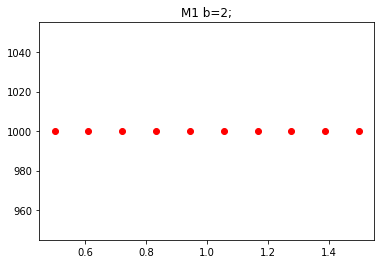

In [21]:
b=2
a_line=np.linspace(0.5, 1.5, 10)
# a_line=[1, 1.2, 1.5]
h=1e-2
ts=get_periods(x0=0.8, y0=0.8, get_eq=get_eq_points_m1, a_line=a_line, b=b, h=h)
print("TS:", ts)
plt.plot(a_line, ts, "ro")
plt.title(f"M1 b={b};")
plt.show()

In [38]:
def all_types_are_correct(types):
  all_correct=True
  for ((t0, t1), a, b) in types:
    t0_expected=get_portarit_type_by_parameters(a,b,'m0')
    t1_expected=get_portarit_type_by_parameters(a,b,'m1')
    all_correct=all_correct and (t0,t1)==(t0_expected, t1_expected)
  return all_correct

In [46]:
# types=get_all_portrait_types()
types=[
       (('Устойчивый фокус', 'Седло'), 1.066, 0.913),
       (('Устойчивый узел', 'Седло'), 0.6, 0.56), 
       (('Седло', 'Устойчивый узел'), 0.58, 0.592), 
       (('Седло', 'Устойчивый фокус'), 0.73, 2.277),
       (('Неустойчивый фокус', 'Седло'), 1.348, 1.284),
       (('Седло', 'Неустойчивый фокус'), 1.237, 1.394), 
       (('Неустойчивый узел', 'Седло'), 1.388, 1.37),
       (('Седло', 'Неустойчивый узел'), 1.409, 1.425)
       ]
print(f'ALL TYPES ARE CORRECT:{ all_types_are_correct(types)}')



ALL TYPES ARE CORRECT:True


Атлас фазовых портретов

8 Типов


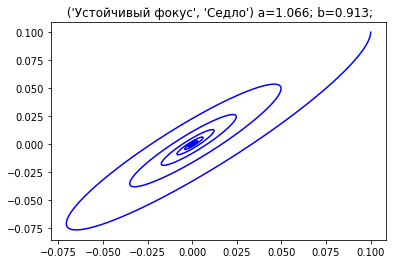

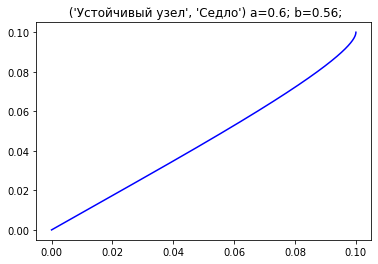

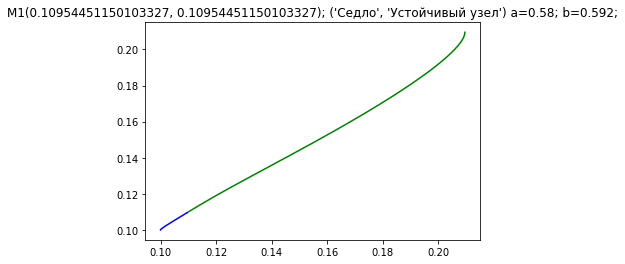

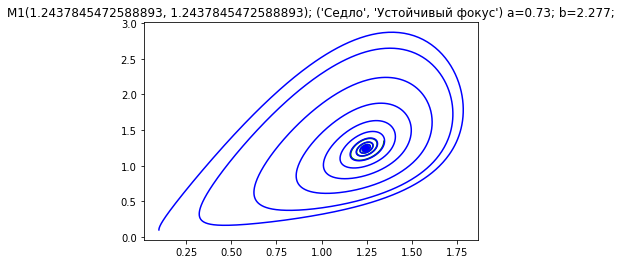

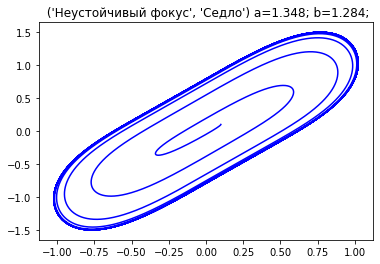

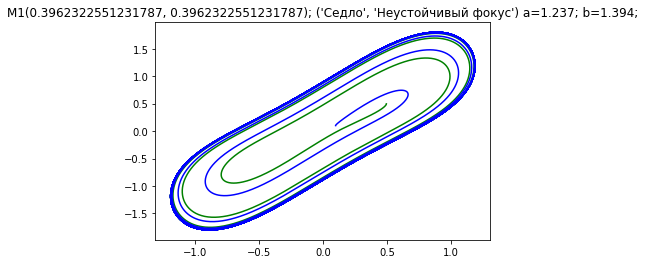

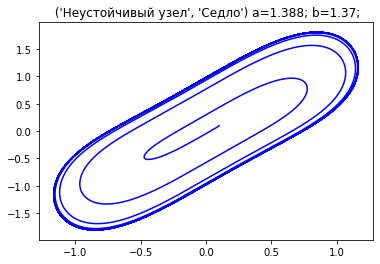

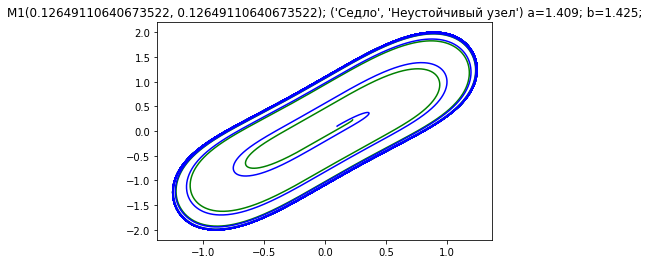

In [47]:
print(len(types),"Типов")
for (type_name, a, b) in types:
  m1_des=""
  if b>=a:
    x_eq, y_eq = (math.sqrt(b-a),math.sqrt(b-a))
    xs, ys = get_plot_runge_kutt(x0=x_eq+0.1, y0=y_eq+0.1, a=a, b=b, points_count=10**4)
    plt.plot(xs, ys, color='g')
    m1_des =f"M1{x_eq, y_eq};"
  xs, ys = get_plot_runge_kutt(x0=0.1, y0=0.1, a=a, b=b, points_count=10**4)
  plt.plot(xs, ys, color='b')
    # cycle=get_cycle(xs, ys, x_eq, y_eq)
    # plt.plot(cycle[0], cycle[1], color='r')
  plt.title(f"{m1_des} {type_name} a={a}; b={b};")
  plt.show()
